Marginals demo
==============

It is often useful to calculate the marginal probability distribution of a variable (represented by an edge in the factor graph). We can use a write buffer to tell ForneyLab where to calculate and store our marginal of interest.

Suppose we have the following factor graph with observed variables $x$ and $y$ and latent variable $z$. Factors `n1` and `n2` represent independent Gaussian noise sources with known means and variances.
```
               (z)
    (x) ---> + ---> + ---> (y)
             |      |
            (n1)   (n2)
```
We are now interested in calculating the marginal $p(z)$ over the latent variable $z$.


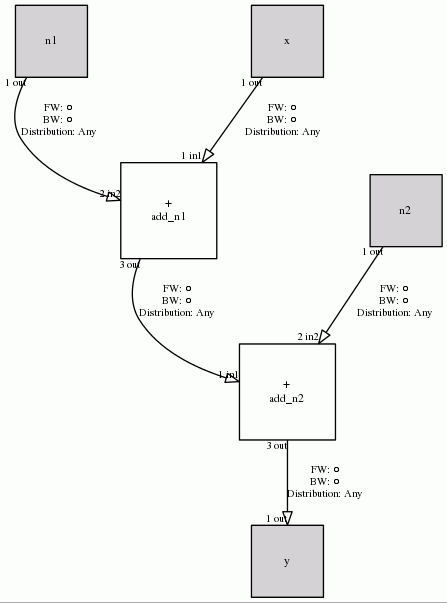

In [1]:
using ForneyLab

# Create nodes
x = TerminalNode(DeltaDistribution(2.0), name="x")
y = TerminalNode(DeltaDistribution(3.0), name="y")
n1 = TerminalNode(GaussianDistribution(m=0.0, V=1.0), name="n1")
n2 = TerminalNode(GaussianDistribution(m=2.0, V=1.0), name="n2")
add_n1 = AdditionNode(name="add_n1")
add_n2 = AdditionNode(name="add_n2")

# Create the edges
Edge(x, add_n1.i[:in1])
Edge(n1, add_n1.i[:in2])
edge_z = Edge(add_n1.i[:out], add_n2.i[:in1])
Edge(n2, add_n2.i[:in2])
Edge(add_n2.i[:out], y)

# Inspect the graph
draw()

We assign our edge of interest to a variable `edge_z` so we can use it to construct a write buffer. After this we define a sumproduct algorithm that calculates the marginal we are interested in.

In [2]:
# Construct the write buffer and sumproduct algorithm
z_buffer = setWriteBuffer(edge_z)
algo = SumProduct.Algorithm()

# Calculate and show the marginal
run(algo)
println("Marginal p(z):")
show(ensureMVParametrization!(z_buffer[end]))

Marginal p(z):
N(m=[1.50], V=[[0.50]])
